**SIMULACION CALIDAD DEL AIRE ENFOCADA A SISTEMAS EMBEBIDOS**
>El proyecto de simulación de calidad del aire enfocado a sistemas embebidos se centra en la recopilación, procesamiento y visualización de datos relacionados con la calidad del aire. En el código proporcionado, se generó un conjunto de datos simulados que representan la concentración de varios contaminantes atmosféricos a lo largo del tiempo.

>Esta simulación se puede enfocar a sistemas embebidos al implementar un dispositivo de monitoreo de calidad del aire en tiempo real. Los sistemas embebidos, como los microcontroladores o sistemas basados en Raspberry Pi, pueden ser programados para recopilar datos de sensores de calidad del aire y procesarlos de manera eficiente. Luego, estos datos pueden ser utilizados para tomar decisiones en tiempo real, como activar sistemas de purificación de aire o enviar alertas a los usuarios cuando se detecten niveles de contaminación peligrosos.

>Además, al integrar técnicas de bajo consumo de energía y optimización de recursos, los sistemas embebidos pueden operar de manera autónoma durante largos períodos de tiempo, lo que los hace ideales para aplicaciones de monitoreo ambiental continuo en entornos urbanos, industriales o domésticos. En resumen, este proyecto muestra cómo la simulación de calidad del aire puede ser implementada y adaptada efectivamente en sistemas embebidos para mejorar la calidad de vida y la salud pública.

In [15]:
from tabulate import tabulate
import pandas as pd
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt

In [18]:
# Crear listas vacías para almacenar los datos
fechas = []
contaminantes = []
concentraciones = []
unidades = []

# Generar 100 datos aleatorios
for _ in range(1000):
    fecha = datetime(2024, random.randint(1, 12), random.randint(1, 28)).strftime('%Y-%m-%d')
    contaminante = random.choice(['CO2', 'CO', 'NO2', 'SO2', 'PM10', 'PM2.5'])
    concentracion = round(random.uniform(0, 100), 2)
    unidad = random.choice(['ppm', 'ppb'])

    fechas.append(fecha)
    contaminantes.append(contaminante)
    concentraciones.append(concentracion)
    unidades.append(unidad)

# Crear el DataFrame
datos_calidad_aire = pd.DataFrame({
    'Fecha': fechas,
    'Contaminante': contaminantes,
    'Concentracion': concentraciones,
    'Unidad': unidades
})

In [19]:
print(datos_calidad_aire)

          Fecha Contaminante  Concentracion Unidad
0    2024-10-06        PM2.5          51.78    ppb
1    2024-06-11           CO          53.77    ppb
2    2024-05-07        PM2.5           4.24    ppb
3    2024-11-26          NO2          49.82    ppb
4    2024-02-27          SO2          54.63    ppb
..          ...          ...            ...    ...
995  2024-03-11          CO2          71.48    ppb
996  2024-11-06          NO2           5.53    ppm
997  2024-12-08           CO          52.34    ppm
998  2024-08-01          SO2          60.54    ppm
999  2024-04-08          SO2          85.04    ppb

[1000 rows x 4 columns]


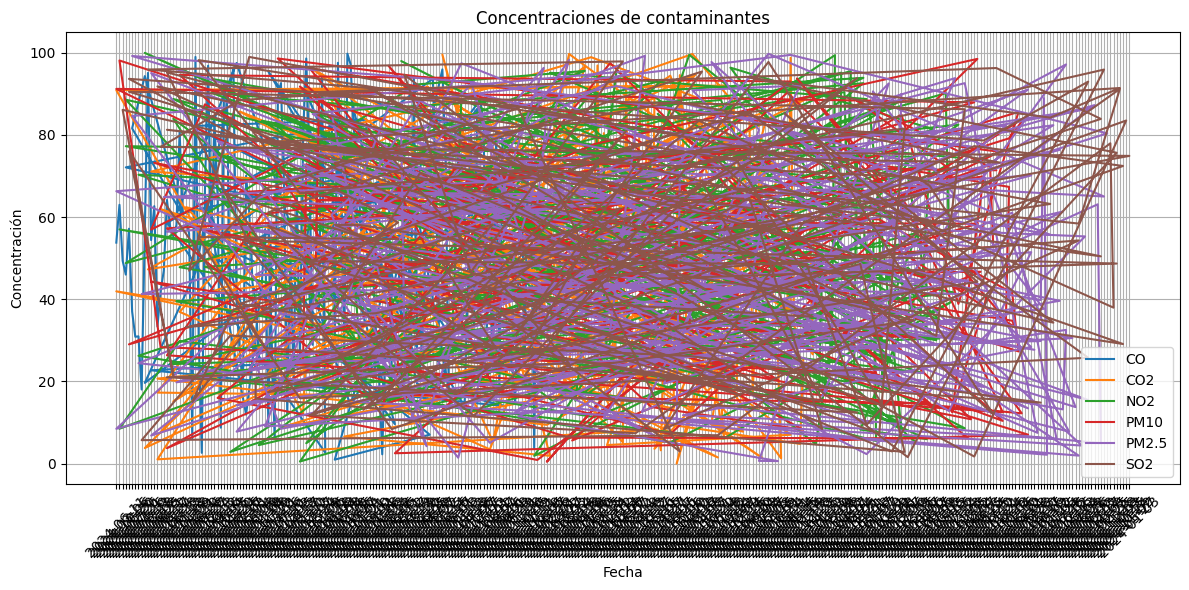

In [20]:
# Agrupar los datos por contaminante
grupo_contaminantes = datos_calidad_aire.groupby('Contaminante')

# Graficar las concentraciones de contaminantes a lo largo del tiempo
plt.figure(figsize=(12, 6))

for contaminante, datos in grupo_contaminantes:
    plt.plot(datos['Fecha'], datos['Concentracion'], label=contaminante)

plt.title('Concentraciones de contaminantes')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-21-db89dffd5546>:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


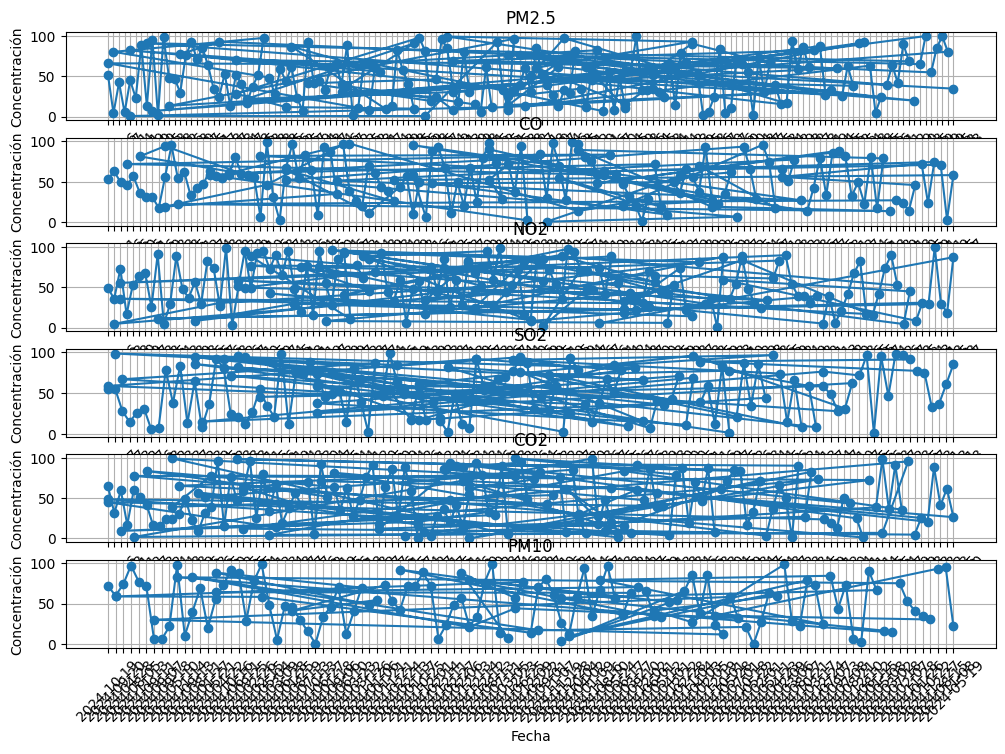

In [21]:
# Obtener la lista de contaminantes únicos
contaminantes_unicos = datos_calidad_aire['Contaminante'].unique()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Iterar sobre cada contaminante y graficarlo por separado
for i, contaminante in enumerate(contaminantes_unicos, start=1):
    plt.subplot(len(contaminantes_unicos), 1, i)
    datos_contaminante = datos_calidad_aire[datos_calidad_aire['Contaminante'] == contaminante]
    plt.plot(datos_contaminante['Fecha'], datos_contaminante['Concentracion'], marker='o', linestyle='-')
    plt.title(contaminante)
    plt.xlabel('Fecha')
    plt.ylabel('Concentración')
    plt.xticks(rotation=45)
    plt.grid(True)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()